<h3 style='color:blue' align='center'>Handling imbalanced data in customer churn prediction</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model.
We will then handle imbalance in data using various techniques and improve f1-score

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Load the data**

In [3]:
df = pd.read_csv("D:\\9.BOOKS MATERIALS\\4.PROGRAMS\\Python_Programs\\Datasets\\customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
729,2753-JMMCV,Male,0,No,No,65,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),74.20,4805.65,No
2696,5472-CVMDX,Female,0,No,No,68,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,38.90,2719.2,No
1593,0620-XEFWH,Male,0,Yes,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.85,84.2,No
5142,6408-OTUBZ,Female,0,No,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),104.55,6779.05,No
1675,6311-UEUME,Female,0,No,No,29,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15,Yes


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
517400/df.shape[0]

73.46301292063042

**First of all, drop customerID column as it is of no use**

In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Ahh... it is string. Lets convert it to numbers**

In [9]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

**Hmmm... some values seems to be not numbers but blank string. Let's find out such rows**

In [10]:
# coerce will ignore the space
pd.to_numeric(df.TotalCharges, errors='coerce') 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
# To display the records that contain space (null) in TotalCharges feature
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.shape

(7043, 20)

In [14]:
df.iloc[488].TotalCharges

' '

In [15]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Extract only rows without space in TotalCharges**

In [16]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [19]:
df1.TotalCharges.dtypes

dtype('float64')

In [20]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [21]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

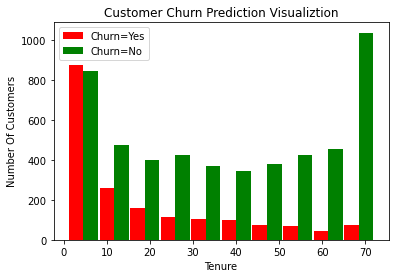

In [22]:
# Churn vs number of customers
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

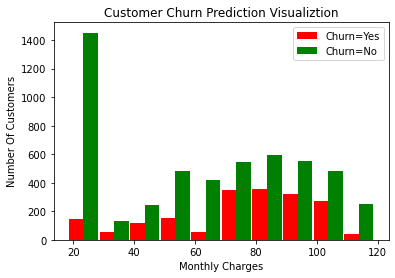

In [23]:
# number of customers vs monthly charges
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion") 

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [24]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [25]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [26]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [27]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [28]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [29]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [30]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [31]:
df1.gender.unique()

array([1, 0], dtype=int64)

**One hot encoding for categorical columns**

In [32]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2.sample(5)
# The number of columns have increased 17 to 27 due to dummy feature creation in one-hot encoding

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4693,0,0,0,1,52,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6288,0,0,0,0,2,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2495,1,0,1,0,38,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
724,0,1,1,0,33,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4346,1,0,1,0,42,1,1,1,1,0,...,1,0,0,1,0,0,0,1,0,0


In [34]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [35]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [36]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [37]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [38]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [39]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [40]:
5163/1869

2.7624398073836276

In [41]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [42]:
X_train.shape

(5625, 26)

In [43]:
X_test.shape

(1407, 26)

In [44]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [45]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [46]:
#!pip install tensorflow_addons

In [47]:
from tensorflow_addons import losses

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [49]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4959 - accuracy: 0.7568
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.7943
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.7993
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.7998
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8020
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8021
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8037
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8066
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8030
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4073 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8293
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8270
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8281
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8306
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8309
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8318
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8308
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8336
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8293
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 

## Mitigating Skewdness of Data

### Method 1: Undersampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [51]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()
count_class_0, count_class_1 

(5163, 1869)

In [52]:
# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [53]:
df_class_0.shape, df_class_1.shape, 

((5163, 27), (1869, 27))

In [54]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1915,0,0,0,0,0.323944,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2786,0,0,0,1,0.366197,1,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1


In [55]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [56]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
# stratify helps to balance the dataset in both training and testing set

In [57]:
# Number of classes in training Data
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

Printing Classification in the last, Scroll down till the last epoch to watch the classification report

In [58]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.6686
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.7595
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7652
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7716
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.7739
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7753
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8161
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8187
Epoch 84/100
94/94 [==============================] - 0s 999us/step - loss: 0.3955 - accuracy: 0.8184
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8201
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8207
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8194
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8191
Epoch 89/100
94/94 [==============================] - 0s 999us/step - loss: 0.3912 - accuracy: 0.8174
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8187
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8194
Epoch 92/

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method2: Oversampling

In [59]:
count_class_0, count_class_1 
# 0 has more samples than class 1. So, we have to oversample records that belong class 1

(5163, 1869)

In [60]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [61]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [62]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [63]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7237
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7587
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7630
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7678
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7679
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7736
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4667 - accuracy: 0.7738
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.7786
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7808
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4592 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8331
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8327
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8309
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8324
Epoch 85/100
259/259 [==============================] - 0s 986us/step - loss: 0.3764 - accuracy: 0.8326
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8338
Epoch 87/100
259/259 [==============================] - 0s 993us/step - loss: 0.3739 - accuracy: 0.8324
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8323
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8327
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3755 - accura

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method3: SMOTE

To install imbalanced-learn library use **pip install imbalanced-learn** command

In [64]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [68]:
y.value_counts()
# imbalanced

0    5163
1    1869
Name: Churn, dtype: int64

In [65]:
#!pip install imbalanced-learn

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts() 

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

SMOT Oversampling increases f1 score of minority class 1 from **0.57 to 0.81 (huge improvement)** Also over all accuracy improves from 0.78 to 0.80

### Method4: Use of Ensemble with undersampling

In [75]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [76]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [78]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [79]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [80]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [81]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [84]:
df3_class0.shape, df3_class1.shape, 

((4130, 27), (1495, 27))

In [85]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [86]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6191 - accuracy: 0.6559
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.7582
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7692
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7739
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7759
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7773
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7829
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8167
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8251
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8194
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8234
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8247
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8247
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8237
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8231
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8204
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8217
Epoch 93/100


In [87]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.7068 - accuracy: 0.5472
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7247
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.7518
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7548
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7555
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7585
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7585
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7605
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7639
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7645
Epoch 11/

Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8134
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8124
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.8130
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8120
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8124
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8130
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8137
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8167
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8191
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8201


In [88]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 0.5953 - accuracy: 0.6846
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7617
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.7632
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7674
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7681
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7750
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7738
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7757
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.7787
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7769
Epoch 11/

Epoch 83/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8239
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8269
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8273
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8269
Epoch 87/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8273
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8281
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8258
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8300
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8228
Epoch 92/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8292


In [89]:
len(y_pred1)

1407

In [90]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [91]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1033
           1       0.48      0.75      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.72      0.73      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes